**Abstract:** Artificial Intelligence is revolutionizing the world of technology and general quality of life finding application in health monitoring and diagnostic, autonomous driving, ecommerce, etc. Machine learning is one such learning technique which helps a machine to learn from data and take intelligent decisions. Over the past two decades use of machine learning in business and research is becoming extremely popular and continuing to have its influence with time. In this article, we will explore and analyze the trend and characteristic in the use of Machine learning (ML) methods in business. The data used in this analysis is collected from about 19,717 respondents through survey questions. 

2019 Data Science survey consists response to data science related questions across 171 countries. In this work, we will investigate the trend in the use of ML methods by forming questions and provide answers justified by the analysis of the data performed on the dataset.
As the starting phase, we will explore the 34 questions. We will begin by loading the ‘questions_only.csv’. First we will begin by importing important modules and reading the dataset. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting and visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kaggle-survey-2019/questions_only.csv
/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv
/kaggle/input/kaggle-survey-2019/other_text_responses.csv
/kaggle/input/kaggle-survey-2019/survey_schema.csv


We will read the file ''

In [2]:
df_questions=pd.read_csv("../input/kaggle-survey-2019/questions_only.csv")
print(df_questions)

  Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   

                                       Q2  \
0  What is your gender? - Selected Choice   

                                          Q3  \
0  In which country do you currently reside?   

                                                  Q4  \
0  What is the highest level of formal education ...   

                                                  Q5  \
0  Select the title most similar to your current ...   

                                                  Q6  \
0  What is the size of the company where you are ...   

                                                  Q7  \
0  Approximately how many individuals are respons...   

                                                  Q8  \
0  Does your current employer incorporate machine...   

                                                  Q9  ...  \
0  Select any activities that make up an impo

Out of the 34 questions, question 8 is of importance to us for the moment. Through the analysis of question 8, we would be able to gain insight into the popularity/use of ML methods into business. Now we will load the dataset from 'multiple_choice_responses.csv'

In [3]:
df_mcq=pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


df_mcq now consists of the multiple choice responses from the respondents. Let us have a look at the format of the dataset  

In [4]:
print(df_mcq.head())

  Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                 510                        22-24   
2                                 423                        40-44   
3                                  83                        55-59   
4                                 391                        40-44   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                    Male   
2                                    Male   
3                                  Female   
4                                    Male   

                                       Q2_OTHER_TEXT  \
0  What is your gender? - Prefer to self-describe...   
1                                                 -1   
2                                                 -1   
3                                                 -1   
4                           

The first row of the dataset is the question number. Our interest is 'Q8', hence we will access the contents of column of Q8 and view it

In [5]:
mcq_q8=df_mcq['Q8']
print(mcq_q8)

0        Does your current employer incorporate machine...
1                                            I do not know
2        We have well established ML methods (i.e., mod...
3                                                      NaN
4                                            I do not know
                               ...                        
19713                                                  NaN
19714                                        I do not know
19715                                                  NaN
19716    We recently started using ML methods (i.e., mo...
19717    We have well established ML methods (i.e., mod...
Name: Q8, Length: 19718, dtype: object


The first row is the question itself and hence should be removed and we need only the response. This is done with the following line of code. We will visualize it for sanity check.

In [6]:
mcq_q8=mcq_q8[1:len(mcq_q8)]
print(mcq_q8)

1                                            I do not know
2        We have well established ML methods (i.e., mod...
3                                                      NaN
4                                            I do not know
5                            No (we do not use ML methods)
                               ...                        
19713                                                  NaN
19714                                        I do not know
19715                                                  NaN
19716    We recently started using ML methods (i.e., mo...
19717    We have well established ML methods (i.e., mod...
Name: Q8, Length: 19717, dtype: object


Now our responses to question 8 is stored in the series object mcq_q8. This also contains Nan values which are because many respondent did not answer that specific question. hence, we will omit those respondents from our analysis that did not asnwer that specific questions. This is done in the next step.

In [7]:
mcq_q8=mcq_q8.dropna()

Next, we will get a list of the different options chosen by the respondents. 

In [8]:
print(mcq_q8.drop_duplicates())

1                                         I do not know
2     We have well established ML methods (i.e., mod...
5                         No (we do not use ML methods)
7     We are exploring ML methods (and may one day p...
8     We recently started using ML methods (i.e., mo...
16    We use ML methods for generating insights (but...
Name: Q8, dtype: object


So, we have total of 6 different responses. (1) I do not know, (2) Established ML methods, (3) Exploring ML methods, (4) Started ML methods, (5) Using ML for insights and (6) Don't use ML method. As a next step, we will get a count of the number of respondents in each category. We will parse through the response and assign the following names to each of the category. 

1) I do not know- 'know'
2) Established ML methods- 'established'
3) Exploring ML methods- 'exploring'
4) Started ML methods- 'started'
5) Using ML for insights- 'insights'
6) Don't use ML method- 'No'

After that we will get a count of the all the categories. This is done with the following piece of code.

In [9]:
no_use='No'
not_sure='know'
exploring='exploring'
started='started'
insights='insights'
established='established'

no_use_list=[]
not_sure_list=[]
exploring_list=[]
started_list=[]
insights_list=[]
established_list=[]

for i in mcq_q8:
    if no_use in i:
        no_use_list.append(i)
    if not_sure in i:
        not_sure_list.append(i)
    if exploring in i:
        exploring_list.append(i)
    if started in i:
        started_list.append(i)
    if insights in i:
        insights_list.append(i)
    if established in i:
        established_list.append(i)
print(len(no_use_list))
print(len(not_sure_list))
print(len(exploring_list))
print(len(started_list))
print(len(established_list))
print(len(insights_list))

2415
1191
2812
2731
2528
1550


Next we will visualize the above data with a bar plot and analyse it a little bit before proceding further.

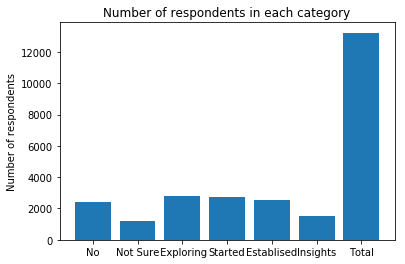

In [10]:
objects = ('No', 'Not Sure', ' Exploring', 'Started', 'Establised', 'Insights','Total')
y_pos = np.arange(len(objects))
performance = [len(no_use_list),len(not_sure_list),len(exploring_list),len(started_list),len(established_list),len(insights_list),len(mcq_q8)]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of respondents')
plt.title('Number of respondents in each category')

plt.show()

As we can see from the above plot, an initial conclusion that can be drawn that, most of the respondents work in companies which are exploring ML methods, which is closely followed by companies who have just started using ML methods which is followed by companies which have well established ML methods. This initial trend shows that Machine Learning which was a hot topic mainly in the research/academia few decades earlier, is slowly pushing towards the commercial side. With more companies beginning to explore the use of ML methods than the companies which have either just started or already have established ML methods. It will be interesting to see how the trend will be in the future years. 

Next, we will delve into more deeper analysis of those different groups. We will examine what and how the various other parameters of different respondents from the different groups has to do with the increasing trend of the use of ML methods in business. Hence, we have six distinct group. We will assign names to those groups based on their response to question 8. These groups will be used to form 6 dataframes as follows:

1) Respondents who do not use ML methods -> df_no
2) Respondents who are not sure -> df_not_sure
3) Respondents with exploring ML methods -> df_exp
4) Respondents who just started ML methods -> df_start
5) Respondents with established ML methods -> df_est
6) Respondents using ML for insights > df_insight



In [11]:
df_mcq['Q8']=df_mcq['Q8'].fillna(0)
df_mcq = df_mcq.loc[df_mcq['Q8'] != 0]
print(df_mcq)

      Time from Start to Finish (seconds)                           Q1  \
0                   Duration (in seconds)  What is your age (# years)?   
1                                     510                        22-24   
2                                     423                        40-44   
4                                     391                        40-44   
5                                     392                        22-24   
...                                   ...                          ...   
19707                                 147                        18-21   
19710                                  88                        25-29   
19714                                 473                        18-21   
19716                                 176                        25-29   
19717                                 567                        50-54   

                                           Q2  \
0      What is your gender? - Selected Choice   
1            

Now df_mcq only contains those respondents which had valid response to question 8. This is done by filling the NaN values in Q8 with 0 and then selecting those values from the entire dataframe df_mcq which does not have value 0 in the column corresponding to question 8. However, before we proceed further, we have to delete the first row from the dataframe so that we can access rows by indexing question numbers and remove the raw questions from the dataframe.

In [12]:
df_mcq=df_mcq[1:len(df_mcq)]
print(df_mcq)

      Time from Start to Finish (seconds)     Q1                 Q2  \
1                                     510  22-24               Male   
2                                     423  40-44               Male   
4                                     391  40-44               Male   
5                                     392  22-24               Male   
6                                     470  50-54               Male   
...                                   ...    ...                ...   
19707                                 147  18-21               Male   
19710                                  88  25-29  Prefer not to say   
19714                                 473  18-21               Male   
19716                                 176  25-29               Male   
19717                                 567  50-54               Male   

      Q2_OTHER_TEXT         Q3                                    Q4  \
1                -1     France                       Master’s degree   
2  

Now, we will create the above 6 dataframes containingthe 6 group of respondents. This is implemented by the following piece of code.

In [13]:
criteria_1=[]
criteria_2=[]
criteria_3=[]
criteria_4=[]
criteria_5=[]
criteria_6=[]
for i in df_mcq['Q8']:
    criteria_1.append(no_use in i)
    criteria_2.append(not_sure in i)
    criteria_3.append(exploring in i)
    criteria_4.append(started in i)
    criteria_5.append(established in i)
    criteria_6.append(insights in i)
#print(criteria)

df_no=df_mcq[criteria_1]
df_not_sure=df_mcq[criteria_2]
df_exp=df_mcq[criteria_3]
df_start=df_mcq[criteria_4]
df_est=df_mcq[criteria_5]
df_insight=df_mcq[criteria_6]

Now, lets do a sanity check to see if the length of these dataframes matches with our earlier calculated number of respondents of each group. Also, we will visualize one of the dataframe to see if it has all the columns of questions.

In [14]:
print(len(df_no))
print(len(df_not_sure))
print(len(df_exp))
print(len(df_start))
print(len(df_est))
print(len(df_insight))

2415
1191
2812
2731
2528
1550


Bingo! It matches. Now lets visualize one of the dataframe

In [15]:
print(df_exp)

      Time from Start to Finish (seconds)     Q1      Q2 Q2_OTHER_TEXT  \
7                                     529  22-24    Male            -1   
10                                    691  55-59    Male            -1   
17                                    426  18-21    Male            -1   
21                                   1529  22-24  Female            -1   
23                                    691  25-29    Male            -1   
...                                   ...    ...     ...           ...   
19592                                 179  25-29    Male            -1   
19602                                  83  18-21    Male            -1   
19624                                 766  22-24    Male            -1   
19658                                 304  22-24    Male            -1   
19672                                 104  25-29  Female            -1   

                                                      Q3  \
7                                                  

As we delve deeper, we will focus on the primary objective of this analysis which is the comparative understanding of the companies that have started exploring ML methods, have started ML methods, with established ML methods and those who use ML methods for insights. Hence, we can exclude two groups from our analysis: (i) respondents who answered that their comapanies don't use ML methods and respondents who answered that they are not sure. Hence we will be focussing on the remaining four groups.
We will explore and analyse the following questions:
1. What is the relation of the size of a company to them adopting ML methods in their business. (Q6)
2. What is the relation of number of people who are responsible for data science (DS) workload and the size of the company with them adopting ML methods in their business. (Q6,Q7)
3. What is the observation on the compensation of people who work for companies that adopt ML methods in their business (Q6,Q10)


In [16]:
# dataframe lists
df_list=[df_exp,df_start,df_est,df_insight]
# dataframe for exploring group extracting Q6, Q7 and Q10
list_h1=['Q6','Q7','Q10']
# In order to make sure each group has equal number of unique response for all the questions, we will implement the following piece of code
for i in df_list:
    for j in list_h1:
        print('for',j)
        print(i[j].drop_duplicates())


for Q6
7         50-249 employees
10          0-49 employees
21    1000-9,999 employees
23      > 10,000 employees
38       250-999 employees
Name: Q6, dtype: object
for Q7
7        20+
10       1-2
21     10-14
23         0
47       3-4
82       5-9
429    15-19
Name: Q7, dtype: object
for Q10
7          10,000-14,999
10                $0-999
21         20,000-24,999
27       100,000-124,999
32           7,500-9,999
38         25,000-29,999
41           5,000-7,499
44           3,000-3,999
59       150,000-199,999
64         40,000-49,999
82         70,000-79,999
88       125,000-149,999
94         90,000-99,999
100      200,000-249,999
103          4,000-4,999
104        60,000-69,999
122        80,000-89,999
144        15,000-19,999
159        30,000-39,999
242        50,000-59,999
395      300,000-500,000
462          1,000-1,999
1028     250,000-299,999
1145         2,000-2,999
2512          > $500,000
10757                NaN
Name: Q10, dtype: object
for Q6
8       > 10,000 emplo

As the unique reponses for all the groups are the same, we can continue with our analysis as planned. As a next step, we will get count of the each of each of the responses for Q6, Q7 and Q10 for the four groups. This is implemented by groupby function. With the following section of code, we will plot the 

Q6
0-49 employees          984
1000-9,999 employees    454
250-999 employees       379
50-249 employees        513
> 10,000 employees      482
dtype: int64
Q6
0-49 employees          714
1000-9,999 employees    552
250-999 employees       353
50-249 employees        464
> 10,000 employees      648
dtype: int64
Q6
0-49 employees          486
1000-9,999 employees    531
250-999 employees       274
50-249 employees        296
> 10,000 employees      941
dtype: int64
Q6
0-49 employees          455
1000-9,999 employees    315
250-999 employees       213
50-249 employees        280
> 10,000 employees      287
dtype: int64


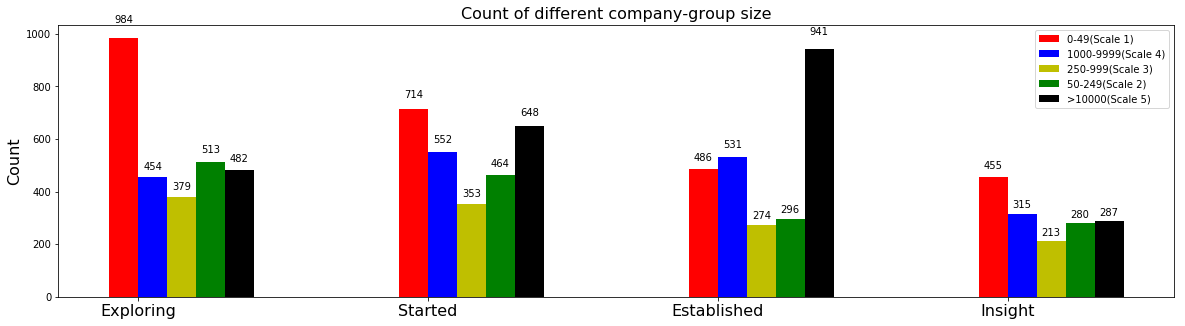

In [17]:
question='Q6'
question_exp=df_exp.groupby(question).size()
question_start=df_start.groupby(question).size()
question_est=df_est.groupby(question).size()
question_insight=df_insight.groupby(question).size()
question_exp_size=[]
question_start_size=[]
question_est_size=[]
question_insight_size=[]
for i in range(len(question_exp)):
    question_exp_size.append(question_exp[i])
    question_start_size.append(question_start[i])
    question_est_size.append(question_est[i])
    question_insight_size.append(question_insight[i])
    
print(question_exp)    
print(question_start) 
print(question_est)
print(question_insight) 

first_choice=[question_exp_size[0],question_start_size[0],question_est_size[0],question_insight_size[0]]
second_choice=[question_exp_size[1],question_start_size[1],question_est_size[1],question_insight_size[1]]
third_choice=[question_exp_size[2],question_start_size[2],question_est_size[2],question_insight_size[2]]
fourth_choice=[question_exp_size[3],question_start_size[3],question_est_size[3],question_insight_size[3]]
fifth_choice=[question_exp_size[4],question_start_size[4],question_est_size[4],question_insight_size[4]]

ind = np.arange(4) 
width = 0.1
fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, first_choice, width, color='r')
rects2 = ax.bar(ind+width, second_choice, width, color='b')
rects3 = ax.bar(ind+(2*width), third_choice, width, color='y')
rects4 = ax.bar(ind+(3*width), fourth_choice, width, color='g')
rects5 = ax.bar(ind+(4*width), fifth_choice, width,color='black')

ax.set_ylabel('Count',fontsize=16)
ax.set_title('Count of different company-group size',fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Exploring', 'Started', 'Established', 'Insight'),fontsize=16)

ax.legend((rects1[0], rects2[0],rects3[0],rects4[0],rects5[0]), ('0-49(Scale 1)', '1000-9999(Scale 4)','250-999(Scale 3)','50-249(Scale 2)','>10000(Scale 5)'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
    


**Observations**
From the above figure, we can summarize the following observations. For convenience we have assigned Scale 1-5 to companies based on their size. 1 being the smallest and 5 being the largest.
1. Number of scale 1 companies decreases as we move from the group exploring->started->established->insight. The same trend is observed with scale 2 and scale 3 companies. 
2. For scale 5 companies, the number increases as we move from the group insight->exploring->started->established. Although scale 4 companies are a outlier to the two observation. if we combine the numbers from scale 4 and scale 5 companies, we can actually see that they are following the second trend. 

**Analyses**
Based on the above observations, we can put forward the following analyses:
1. Scale 5 companies account for the highest number in the established group, second highest in the started group, third highest in the exploring group and insight group. This shows that majority of the companies which have established ML methods in their business are large scale companies with over 10000 employees. Even though one might intuitavely think that as machines become more intelligent and ubiquitous, it might start replacing many human jobs which might subsequently result in unemployment. However, this trend shows the opposite of that. Higher the use of ML and AI in business, the more people it will need to meet the demand of the business. Hence, although it is true that machines might be replacing many human jobs, it creates more lucractive and better opportunities thereby pushing the boundary of human excellence even further. Just like industrial revolution created jobs and avenues, so will this wave of AI revolution.
2. If we consider companies which use ML methods for insights only, we observe that the scale 1 companies or the very small scale companies possibly in the start up phase make the most use of ML methds for drawing insights. This is intutitive in the sense that having small scale companies require optimization of workforce and resources at the same time delivering good throughput. Using ML methods are helpful in such situations because drawing insights from ML methods will help in optimization of resources by taking cost effective decisions. 
3. In order to actively apply ML methods to business, it is imperative for companies to expand in size (evident from data). The number of scale companies in established group is much less than as compared to that in exploring or started group. Now what about the small scale companies that are in established group which is still significantly higher than scale 2 and scale 3 companies which can be considered to be decent sized comapnies. What traits of those small scale companies makes it possible to go against the norm which we are observing so far. For that we might have to look into the other factors, maybe Q7 or Q10, or the questions related to our second hypothesis. Let's continue exploring.


Before we start our analysis with 'Q7', we need to perform some preprocessing to our data. Now we have seen some significant relation between the size of a company and its group to where it belongs. Before we see how 'Q7' plays a role in which group a company belongs, we have to take into account the size of the company as well. Evaluating the number of people responsible for data science (DS) workload with only one parameter, i.e either the size of the company or the group which it belongs will not be informative enough. Hence, we will have to investiagate the relations like, how many people are responsible for DS workload in a small scale company which is the exploring phase and so on. 

To begin our investigation, we will first of all create three groups from each of the four groups of exploring, started, established and insights. These three groups will be (i) small scale company (scale 1), (ii) mid scale (scale 2 and 3) and (iii) large scale company (scale 4 and 5). This is done with the following lines of code.

In [18]:

scale_1='0-49 employees'
scale_2='1000-9,999 employees'
scale_3='250-999 employees'       
scale_4='50-249 employees'        
scale_5='> 10,000 employees' 

# For exploring group
criteria_1=[] # small scale criteria
criteria_2=[] # mid scale criteria
criteria_3=[] # large scale criteria
for i in df_exp['Q6']:
    criteria_1.append(scale_1 in i)
    criteria_2.append(scale_2 in i or scale_3 in i)
    criteria_3.append(scale_4 in i or scale_5 in i)

df_exp_small_scale=df_exp[criteria_1]
df_exp_mid_scale=df_exp[criteria_2]
df_exp_large_scale=df_exp[criteria_3]
# For started group
criteria_1=[] # small scale criteria
criteria_2=[] # mid scale criteria
criteria_3=[] # large scale criteria
for i in df_start['Q6']:
    criteria_1.append(scale_1 in i)
    criteria_2.append(scale_2 in i or scale_3 in i)
    criteria_3.append(scale_4 in i or scale_5 in i)

df_start_small_scale=df_start[criteria_1]
df_start_mid_scale=df_start[criteria_2]
df_start_large_scale=df_start[criteria_3]
# For established group
criteria_1=[] # small scale criteria
criteria_2=[] # mid scale criteria
criteria_3=[] # large scale criteria
for i in df_est['Q6']:
    criteria_1.append(scale_1 in i)
    criteria_2.append(scale_2 in i or scale_3 in i)
    criteria_3.append(scale_4 in i or scale_5 in i)

df_est_small_scale=df_est[criteria_1]
df_est_mid_scale=df_est[criteria_2]
df_est_large_scale=df_est[criteria_3]
# For insight group
criteria_1=[] # small scale criteria
criteria_2=[] # mid scale criteria
criteria_3=[] # large scale criteria
for i in df_insight['Q6']:
    criteria_1.append(scale_1 in i)
    criteria_2.append(scale_2 in i or scale_3 in i)
    criteria_3.append(scale_4 in i or scale_5 in i)

df_insight_small_scale=df_insight[criteria_1]
df_insight_mid_scale=df_insight[criteria_2]
df_insight_large_scale=df_insight[criteria_3]


Now we have total of 12 groups and let us now visualize the distribution of the amount of people responsible for DS workload in each othe groups. If we recall from earlier computation, Q7 had seven choices. Analysing that many choices will be difficult for reaching a definitive conclusion. Hence, we will group the seven choices into three bigger groups:(i) small group (0-5 employees), (ii) medium group: (5-15 employees) and (iii) large group: (15-20+ employees). This is implemented with the following lines of code.


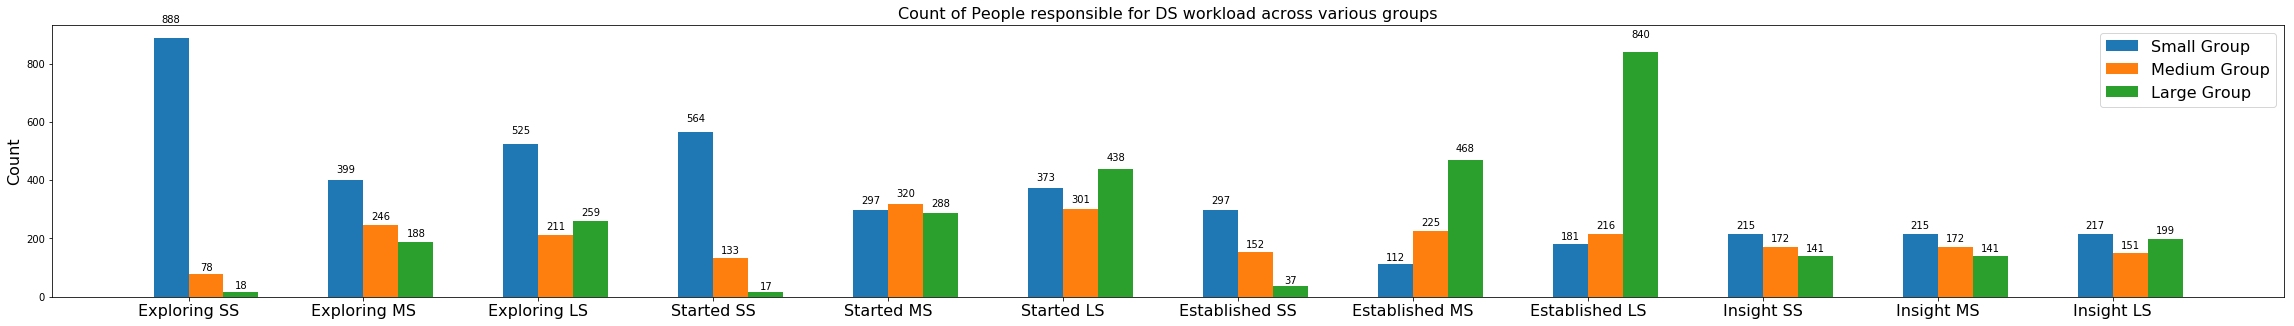

In [19]:
opt_1='0'
opt_2='1-2'
opt_3='3-4'
opt_4='5-9'
opt_5='10-14'
opt_6='15-19'
opt_7='20+'

# Function to append sizes of new group
def size_append(dataframe,question):
    data_frame_option_size=[]
    temp_small_group=[]
    temp_medium_group=[]
    temp_large_group=[]
    for i in dataframe[question]:
        if(i==opt_1 or i==opt_2 or i==opt_3):
            temp_small_group.append(i)
        if(i==opt_4 or i==opt_5):
            temp_medium_group.append(i)
        if(i==opt_6 or i == opt_7):
            temp_large_group.append(i)
    data_frame_option_size.append(len(temp_small_group))
    data_frame_option_size.append(len(temp_medium_group))
    data_frame_option_size.append(len(temp_large_group))
    return data_frame_option_size
    
           
question_exp_small_scale_size=size_append(df_exp_small_scale,'Q7')
question_exp_mid_scale_size=size_append(df_exp_mid_scale,'Q7')
question_exp_large_scale_size=size_append(df_exp_large_scale,'Q7')

question_start_small_scale_size=size_append(df_start_small_scale,'Q7')
question_start_mid_scale_size=size_append(df_start_mid_scale,'Q7')
question_start_large_scale_size=size_append(df_start_large_scale,'Q7')
        
question_est_small_scale_size=size_append(df_est_small_scale,'Q7')
question_est_mid_scale_size=size_append(df_est_mid_scale,'Q7')
question_est_large_scale_size=size_append(df_est_large_scale,'Q7')

question_insight_small_scale_size=size_append(df_insight_mid_scale,'Q7')
question_insight_mid_scale_size=size_append(df_insight_mid_scale,'Q7')
question_insight_large_scale_size=size_append(df_insight_large_scale,'Q7')

first_choice=[question_exp_small_scale_size[0],question_exp_mid_scale_size[0],question_exp_large_scale_size[0],
             question_start_small_scale_size[0],question_start_mid_scale_size[0],question_start_large_scale_size[0],
             question_est_small_scale_size[0],question_est_mid_scale_size[0],question_est_large_scale_size[0],
             question_insight_small_scale_size[0],question_insight_mid_scale_size[0],question_insight_large_scale_size[0]]

second_choice=[question_exp_small_scale_size[1],question_exp_mid_scale_size[1],question_exp_large_scale_size[1],
             question_start_small_scale_size[1],question_start_mid_scale_size[1],question_start_large_scale_size[1],
             question_est_small_scale_size[1],question_est_mid_scale_size[1],question_est_large_scale_size[1],
             question_insight_small_scale_size[1],question_insight_mid_scale_size[1],question_insight_large_scale_size[1]]

third_choice=[question_exp_small_scale_size[2],question_exp_mid_scale_size[2],question_exp_large_scale_size[2],
             question_start_small_scale_size[2],question_start_mid_scale_size[2],question_start_large_scale_size[2],
             question_est_small_scale_size[2],question_est_mid_scale_size[2],question_est_large_scale_size[2],
             question_insight_small_scale_size[2],question_insight_mid_scale_size[2],question_insight_large_scale_size[2]]

ind = np.arange(12) 
width = 0.2
fig, ax = plt.subplots(figsize=(40,5))
rects1 = ax.bar(ind, first_choice, width)
rects2 = ax.bar(ind+width, second_choice, width)
rects3 = ax.bar(ind+(2*width), third_choice, width)

ax.set_ylabel('Count',fontsize=16)
ax.set_title('Count of People responsible for DS workload across various groups',fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Exploring SS', 'Exploring MS', 'Exploring LS', 'Started SS', 'Started MS', 'Started LS',
                    'Established SS', 'Established MS', 'Established LS','Insight SS', 'Insight MS', 'Insight LS' ),fontsize=16)

ax.legend((rects1[0], rects2[0],rects3[0]), ('Small Group', 'Medium Group', 'Large Group'),fontsize=16)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


Based on the above plot, we can make the following analyses and conclusion:
1. For **small scale** companies, irrespective of which group the company belongs to, the number of people responsible for DS workload that belongs to small group is reported to be higher than that those belongs to medium or large group. 
2. For **mid scale** companies, the number of people responsible for DS workload that belongs to **small group** is largest for **exploring group and insight group**, the number of people responsible for DS workload that belongs to **medium group** is largest for **started group** and the number of people responsible for DS workload that belongs to the **large group** is largest for **established group**.
3. For **large scale** companies, the number of people responsible for DS workload that belongs to **small group** is largest for **exploring and insight group** and the number of people responsible for DS workload that belongs to **large group** is largest for **started and established group**

Points 1 is very much intuitive and so are points 2 and 3. However, points 2 and 3 shows a very interesting trend that as companies from exploring/insight group to started or established group, the number of people responsible for DS workload has to be increased. This is irrespective of the company being a small scale or large scale. for example, if we see the number of people that belong to medium group and large group in small scale is 78 and 18 respectively in exploring group, which increased to 133 for medium group and 17 (almost same) for large group for started group and which drastically increased to 152 for large group and 37 for medium group in the esatblished group. Another argument to support the fact is that companies which use ML methods for insight only has more people in the small group responsible for DS workload irrespective of the scale of the company.

Hence, we can conclude that incorporating ML methods in business requires more people working on datascience and as our previous analysis suggest that as companies move from exploring to started to established group, the size of the company will increase and most of these new recruits will be responsible for DS workload. It can be viewed as a good news for aspiring data scientist who are willing to take up data science as profession, as more and more openings in data science are likely to open up as more and more companies start incorporating data science and ML methods in their business. 

Next we will explore the third question we have enumerated: the relation of compensation to the scake of the company and the group they belong to. As we already have seperated the 4 groups into 12 sub groups based on their scale, we have also the framework for analysis for a third variable in relation to the scale and the group of the company. We can easily incorporate the analysis of compensation into our existing framework. 

However, we will have to evaluate the choices available for question 10. Let us have a look once again. 

In [20]:
print(df_mcq.groupby('Q10').size())

Q10
$0-999             1513
1,000-1,999         599
10,000-14,999       833
100,000-124,999     750
125,000-149,999     483
15,000-19,999       529
150,000-199,999     434
2,000-2,999         390
20,000-24,999       526
200,000-249,999     165
25,000-29,999       482
250,000-299,999      65
3,000-3,999         305
30,000-39,999       728
300,000-500,000      74
4,000-4,999         289
40,000-49,999       719
5,000-7,499         536
50,000-59,999       704
60,000-69,999       576
7,500-9,999         408
70,000-79,999       524
80,000-89,999       405
90,000-99,999       377
> $500,000           83
dtype: int64


As there are too many options, we need to group these according to the following criteria
1. Very Small Scale Pay (VSSP) ('0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999','15,000-19,999','20000-24,999')
2. Small Scale Pay (SSP) ('25,000-29,999','30,000-39,999','40000-49,999')
3. Mid Scale Pay (MSP) ('50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999')
4. Large Scale Pay (LSP) ('90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999')
5. Very Large Scale Pay (VLSP) ('200,000-249,000','250,000-299,999')
6. Executive Pay (EP) ('300,000-500,000','> 500,000')

In the following section of code, we will assign variable names to each of the salary options

In [21]:
sal_1='$0-999 '
sal_2='1,000-1,999'
sal_3='2,000-2,999'
sal_4='3,000-3,999'
sal_5='4,000-4,999'
sal_6='5,000-7,499'
sal_7='7,500-9,999'
sal_8='10,000-14,999'
sal_9='15,000-19,999'
sal_10='20,000-24,999'
sal_11='25,000-29,999'
sal_12='30,000-39,999'
sal_13='40,000-49,999'
sal_14='50,000-59,999'
sal_15='60,000-69,999'
sal_16='70,000-79,999'
sal_17='80,000-89,999'
sal_18='90,000-99,999'
sal_19='100,000-124,999'
sal_20='125,000-149,999'
sal_21='150,000-199,999'
sal_22='200,000-249,999'
sal_23='250,000-299,999'
sal_24='300,000-500,000'
sal_25='> $500,000'

Next we will modify the function size_append to categorize these salaries into bigger groups as mentioned above. The function is implemented below.

In [22]:
def size_append_new(dataframe,question):
    dataframe_option_size=[]
    very_small_scale_pay=[]
    small_scale_pay=[]
    mid_scale_pay=[]
    large_scale_pay=[]
    very_large_scale_pay=[]
    executive_pay=[]
    for i in dataframe[question]:
        if(i==sal_1 or i==sal_2 or i==sal_3 or i==sal_4 or i==sal_5 or i==sal_6 or i==sal_7 or i==sal_8 or i==sal_9 or i==sal_10):
            very_small_scale_pay.append(i)
        if(i==sal_11 or i==sal_12 or i==sal_13):
            small_scale_pay.append(i)
        if(i==sal_14 or i==sal_15 or i==sal_16 or i==sal_17):
            mid_scale_pay.append(i)
        if(i==sal_18 or i==sal_19 or i==sal_20 or i==sal_21):
            large_scale_pay.append(i)
        if(i==sal_22 or i==sal_23):
            very_large_scale_pay.append(i)
        if(i==sal_24 or i==sal_25):
            executive_pay.append(i)
    dataframe_option_size.append(len(very_small_scale_pay))  
    dataframe_option_size.append(len(small_scale_pay))
    dataframe_option_size.append(len(mid_scale_pay))
    dataframe_option_size.append(len(large_scale_pay))
    dataframe_option_size.append(len(very_large_scale_pay))
    dataframe_option_size.append(len(executive_pay))
    return dataframe_option_size


Next we will generate count arrays for each of the twelve groups and visualize the bar plots

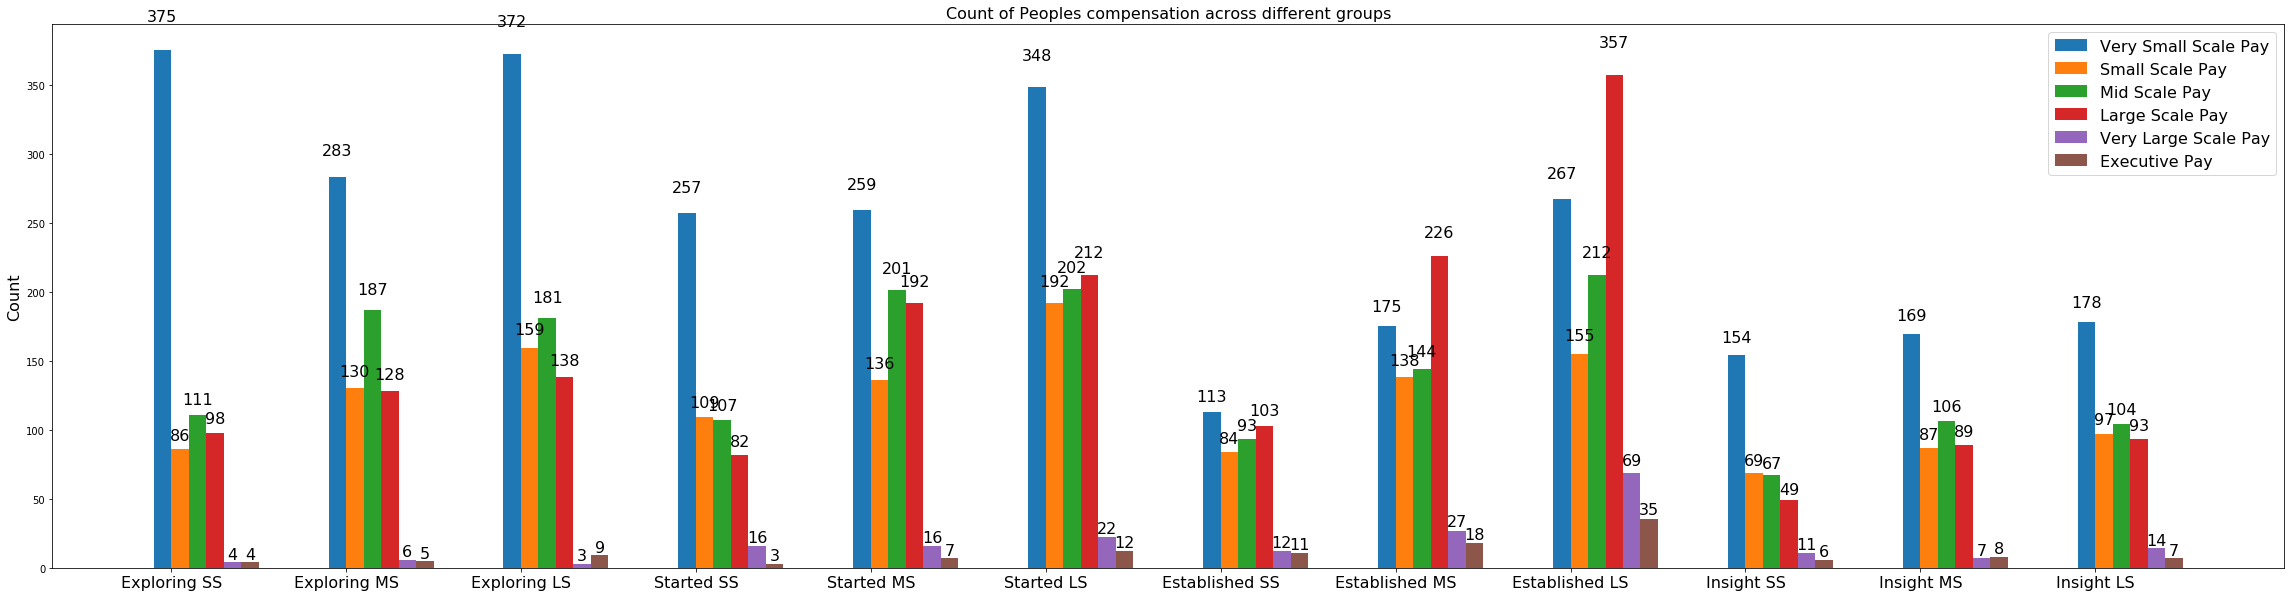

In [23]:
question_exp_small_scale_pay_size=size_append_new(df_exp_small_scale,'Q10')
question_exp_mid_scale_pay_size=size_append_new(df_exp_mid_scale,'Q10')
question_exp_large_scale_pay_size=size_append_new(df_exp_large_scale,'Q10')

question_start_small_scale_pay_size=size_append_new(df_start_small_scale,'Q10')
question_start_mid_scale_pay_size=size_append_new(df_start_mid_scale,'Q10')
question_start_large_scale_pay_size=size_append_new(df_start_large_scale,'Q10')

question_est_small_scale_pay_size=size_append_new(df_est_small_scale,'Q10')
question_est_mid_scale_pay_size=size_append_new(df_est_mid_scale,'Q10')
question_est_large_scale_pay_size=size_append_new(df_est_large_scale,'Q10')

question_insight_small_scale_pay_size=size_append_new(df_insight_small_scale,'Q10')
question_insight_mid_scale_pay_size=size_append_new(df_insight_mid_scale,'Q10')
question_insight_large_scale_pay_size=size_append_new(df_insight_large_scale,'Q10')

first_choice=[question_exp_small_scale_pay_size[0],question_exp_mid_scale_pay_size[0],question_exp_large_scale_pay_size[0],
             question_start_small_scale_pay_size[0],question_start_mid_scale_pay_size[0],question_start_large_scale_pay_size[0],
             question_est_small_scale_pay_size[0],question_est_mid_scale_pay_size[0],question_est_large_scale_pay_size[0],
             question_insight_small_scale_pay_size[0],question_insight_mid_scale_pay_size[0],question_insight_large_scale_pay_size[0]]

second_choice=[question_exp_small_scale_pay_size[1],question_exp_mid_scale_pay_size[1],question_exp_large_scale_pay_size[1],
             question_start_small_scale_pay_size[1],question_start_mid_scale_pay_size[1],question_start_large_scale_pay_size[1],
             question_est_small_scale_pay_size[1],question_est_mid_scale_pay_size[1],question_est_large_scale_pay_size[1],
             question_insight_small_scale_pay_size[1],question_insight_mid_scale_pay_size[1],question_insight_large_scale_pay_size[1]]

third_choice=[question_exp_small_scale_pay_size[2],question_exp_mid_scale_pay_size[2],question_exp_large_scale_pay_size[2],
             question_start_small_scale_pay_size[2],question_start_mid_scale_pay_size[2],question_start_large_scale_pay_size[2],
             question_est_small_scale_pay_size[2],question_est_mid_scale_pay_size[2],question_est_large_scale_pay_size[2],
             question_insight_small_scale_pay_size[2],question_insight_mid_scale_pay_size[2],question_insight_large_scale_pay_size[2]]

fourth_choice=[question_exp_small_scale_pay_size[3],question_exp_mid_scale_pay_size[3],question_exp_large_scale_pay_size[3],
             question_start_small_scale_pay_size[3],question_start_mid_scale_pay_size[3],question_start_large_scale_pay_size[3],
             question_est_small_scale_pay_size[3],question_est_mid_scale_pay_size[3],question_est_large_scale_pay_size[3],
             question_insight_small_scale_pay_size[3],question_insight_mid_scale_pay_size[3],question_insight_large_scale_pay_size[3]]

fifth_choice=[question_exp_small_scale_pay_size[4],question_exp_mid_scale_pay_size[4],question_exp_large_scale_pay_size[4],
             question_start_small_scale_pay_size[4],question_start_mid_scale_pay_size[4],question_start_large_scale_pay_size[4],
             question_est_small_scale_pay_size[4],question_est_mid_scale_pay_size[4],question_est_large_scale_pay_size[4],
             question_insight_small_scale_pay_size[4],question_insight_mid_scale_pay_size[4],question_insight_large_scale_pay_size[4]]

sixth_choice=[question_exp_small_scale_pay_size[5],question_exp_mid_scale_pay_size[5],question_exp_large_scale_pay_size[5],
             question_start_small_scale_pay_size[5],question_start_mid_scale_pay_size[5],question_start_large_scale_pay_size[5],
             question_est_small_scale_pay_size[5],question_est_mid_scale_pay_size[5],question_est_large_scale_pay_size[5],
             question_insight_small_scale_pay_size[5],question_insight_mid_scale_pay_size[5],question_insight_large_scale_pay_size[5]]


ind = np.arange(12) 
width = 0.1
fig, ax = plt.subplots(figsize=(40,10))
rects1 = ax.bar(ind, first_choice, width)
rects2 = ax.bar(ind+width, second_choice, width)
rects3 = ax.bar(ind+(2*width), third_choice, width)
rects4 = ax.bar(ind+(3*width), fourth_choice, width)
rects5 = ax.bar(ind+(4*width), fifth_choice, width)
rects6 = ax.bar(ind+(5*width), sixth_choice, width)

ax.set_ylabel('Count',fontsize=16)
ax.set_title('Count of Peoples compensation across different groups',fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Exploring SS', 'Exploring MS', 'Exploring LS', 'Started SS', 'Started MS', 'Started LS',
                    'Established SS', 'Established MS', 'Established LS','Insight SS', 'Insight MS', 'Insight LS' ),fontsize=16)

ax.legend((rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]), ('Very Small Scale Pay', 'Small Scale Pay', 'Mid Scale Pay',
                                                                           'Large Scale Pay','Very Large Scale Pay','Executive Pay'),fontsize=16)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=16)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)



This bar plot calls for a selective analysis. We will perform two seperate analysis for this plot, salaries above or equal to mid scale pay and less than mid scale pay
1. Salaries above or equal to mid scale pay:
    1. If we look at large scale pays. See how the count of large scale pay increases as we move from small scale to large scale which is intuitive. However, let's compare the increase in count as we move across different groups. 
        1. For exploring group, the count increased by 30 in mid scale companies but further only by 10 as we move to large scale companies
        2. For started group, the count increased by a massive 110 in mid scale companiesand further by 20 as we move to large scale companies
        3. For established group, the count increased by a staggering 123 in mid scale and again by 131 as we move to large scale companies
        4. For insight group, the count increased by 40 in mid scale and just by 4 in large scale companies.
   The initial conclusion that can be drawn is that apart from the common intuition that large scale companies will have higher count of large scale pays, it also turns out that business that use established ML in business tend to be more lucrative (which is why they can afford higher salaries to a large number of people) which is followed by companies which have just started and the exploring group and insight group stand on the same page.
   Furthermore, this trend is not only stands true for large scale pays but also for very large scale pays and executive pays for started and exploring group. Whereas, this strictly increasing trend is missing from exploring and insight group.
   2. If we look at mid scale pays, we will see that there is more or less increasing trend as we move from small scale to large scale irrespective of the group. The reason that the difference in larger pay scale is so evident in the companies that are in started and established group than that in exploring and insight group as compared to mid scale pay across all the four groups is that companies that are in established or started group calls for niche players in their team. These players are more experienced and probably research oriented than their midscale pay or lower counterparts. To have more details on this, we will look into question 5 which we will do in the next part. From this question, in conjunction with other questions we can have an idea of the count of the positions held in different groups of companies.
 2. Salaries below mid scale pay
     People in this group are either interns, PostDocs, PhD, masters or bachelor student. 

For the completeness of the above analysis, we will now investigate the relation between the position an employee holds with their salary and the group that company falls in. For this purpose, we will ignore the group that are in very small scale pay scale and small scale pay scale. We will form three new sub groups from each of the very original four groups that we have that is exploring, started, established and insight group. These 12 groups are as follows:
1. exploring mid scale pay groups (ExMSP)
2. exploring large scale pay groups (ExLSP)
3. exploring very large scale and executive pays (ExVLSEP)
4. started mid scale pay groups (SMSP)
5. started large scale pay groups (SLSP)
6. started very large scale and executive groups (SVLSEP)
7. established mid scale pay groups (EsMSP)
8. established large scale pay groups (EsLSP)
9. established very large scale and executive pay groups (EsVLSEP)
10. Insight mid scale pay groups (IMSP)
11. Insight large scale pay groups (ILSP)
12. Insight very large scale and executive pay groups (IVLSEP)


In [24]:


# For exploring group
criteria_pay_1=[] # mid scale pay criteria
criteria_pay_2=[] # large scale pay criteria
criteria_pay_3=[] # very large scale pay criteria
for i in df_exp['Q10']:
    criteria_pay_1.append(sal_15 in str(i) or sal_16 in str(i) or sal_17 in str(i))
    criteria_pay_2.append(sal_18 in str(i) or sal_19 in str(i) or sal_20 in str(i) or sal_21 in str(i))
    criteria_pay_3.append(sal_22 in str(i) or sal_23 in str(i) or sal_24 in str(i) or sal_25 in str(i))
df_exp_mid_pay=df_exp[criteria_pay_1]
df_exp_large_pay=df_exp[criteria_pay_2]
df_exp_very_large_pay=df_exp[criteria_pay_3]

# For started group
criteria_pay_1=[] # mid scale pay criteria
criteria_pay_2=[] # large scale pay criteria
criteria_pay_3=[] # very large scale pay criteria
for i in df_start['Q10']:
    criteria_pay_1.append(sal_15 in str(i) or sal_16 in str(i) or sal_17 in str(i))
    criteria_pay_2.append(sal_18 in str(i) or sal_19 in str(i) or sal_20 in str(i) or sal_21 in str(i))
    criteria_pay_3.append(sal_22 in str(i) or sal_23 in str(i) or sal_24 in str(i) or sal_25 in str(i))
df_start_mid_pay=df_start[criteria_pay_1]
df_start_large_pay=df_start[criteria_pay_2]
df_start_very_large_pay=df_start[criteria_pay_3]

# For established group
criteria_pay_1=[] # mid scale pay criteria
criteria_pay_2=[] # large scale pay criteria
criteria_pay_3=[] # very large scale pay criteria
for i in df_est['Q10']:
    criteria_pay_1.append(sal_15 in str(i) or sal_16 in str(i) or sal_17 in str(i))
    criteria_pay_2.append(sal_18 in str(i) or sal_19 in str(i) or sal_20 in str(i) or sal_21 in str(i))
    criteria_pay_3.append(sal_22 in str(i) or sal_23 in str(i) or sal_24 in str(i) or sal_25 in str(i))
df_est_mid_pay=df_est[criteria_pay_1]
df_est_large_pay=df_est[criteria_pay_2]
df_est_very_large_pay=df_est[criteria_pay_3]

# For insight group
criteria_pay_1=[] # mid scale pay criteria
criteria_pay_2=[] # large scale pay criteria
criteria_pay_3=[] # very large scale pay criteria
for i in df_insight['Q10']:
    criteria_pay_1.append(sal_15 in str(i) or sal_16 in str(i) or sal_17 in str(i))
    criteria_pay_2.append(sal_18 in str(i) or sal_19 in str(i) or sal_20 in str(i) or sal_21 in str(i))
    criteria_pay_3.append(sal_22 in str(i) or sal_23 in str(i) or sal_24 in str(i) or sal_25 in str(i))
df_insight_mid_pay=df_insight[criteria_pay_1]
df_insight_large_pay=df_insight[criteria_pay_2]
df_insight_very_large_pay=df_insight[criteria_pay_3]

Q5 is the column which states the position held by an individual in their job. So let us explore the choices for that question.

In [25]:
print(df_mcq.groupby('Q5').size())

Q5
Business Analyst            728
DBA/Database Engineer       147
Data Analyst               1481
Data Engineer               587
Data Scientist             3846
Other                      1564
Product/Project Manager     694
Research Scientist         1351
Software Engineer          2547
Statistician                282
dtype: int64


Let us assign variable name to these choices

In [26]:
choice_1='Business Analyst'
choice_2='DBA/Database Engineer'
choice_3='Data Analyst'
choice_4='Data Engineer'
choice_5='Data Scientist'
choice_6='other'
choice_7='Product/Project Manager'
choice_8='Research Scientist'
choice_9='Software Engineer'
choice_10='Statistician'

Now lets define a function that takes a dataframe and the question 10 as parameters and returns an array with the size of each of the options in that order as defined above

In [27]:
def size_pay_append(dataframe,question):
    choice_1_list=[]
    choice_2_list=[]
    choice_3_list=[]
    choice_4_list=[]
    choice_5_list=[]
    choice_7_list=[]
    choice_8_list=[]
    choice_9_list=[]
    choice_10_list=[]
    choice_list=[]
    for choice in dataframe[question]:
        if(choice==choice_1):
            choice_1_list.append(choice)
        if(choice==choice_2):
            choice_2_list.append(choice)
        if(choice==choice_3):
            choice_3_list.append(choice)
        if(choice==choice_4):
            choice_4_list.append(choice)
        if(choice==choice_5):
            choice_5_list.append(choice)
        if(choice==choice_7):
            choice_7_list.append(choice)
        if(choice==choice_8):
            choice_8_list.append(choice)
        if(choice==choice_9):
            choice_9_list.append(choice)
        if(choice==choice_10):
            choice_10_list.append(choice)
    choice_list.append(len(choice_1_list))
    choice_list.append(len(choice_2_list))
    choice_list.append(len(choice_3_list))
    choice_list.append(len(choice_4_list))
    choice_list.append(len(choice_5_list))
    choice_list.append(len(choice_7_list))
    choice_list.append(len(choice_8_list))
    choice_list.append(len(choice_9_list))
    choice_list.append(len(choice_10_list))
    return choice_list

question_exp_mid_pay=size_pay_append(df_exp_mid_pay,'Q5')
question_exp_large_pay=size_pay_append(df_exp_large_pay,'Q5')
question_exp_very_large_pay=size_pay_append(df_exp_very_large_pay,'Q5')

question_start_mid_pay=size_pay_append(df_start_mid_pay,'Q5')
question_start_large_pay=size_pay_append(df_start_large_pay,'Q5')
question_start_very_large_pay=size_pay_append(df_start_very_large_pay,'Q5')

question_est_mid_pay=size_pay_append(df_est_mid_pay,'Q5')
question_est_large_pay=size_pay_append(df_est_large_pay,'Q5')
question_est_very_large_pay=size_pay_append(df_est_very_large_pay,'Q5')

question_insight_mid_pay=size_pay_append(df_insight_mid_pay,'Q5')
question_insight_large_pay=size_pay_append(df_insight_large_pay,'Q5')
question_insight_very_large_pay=size_pay_append(df_insight_very_large_pay,'Q5')

Let us visualize the mid, large and very large scale for exploring, started, established and insight group respectively with 3 different pi charts. Below is the code is for pi chart

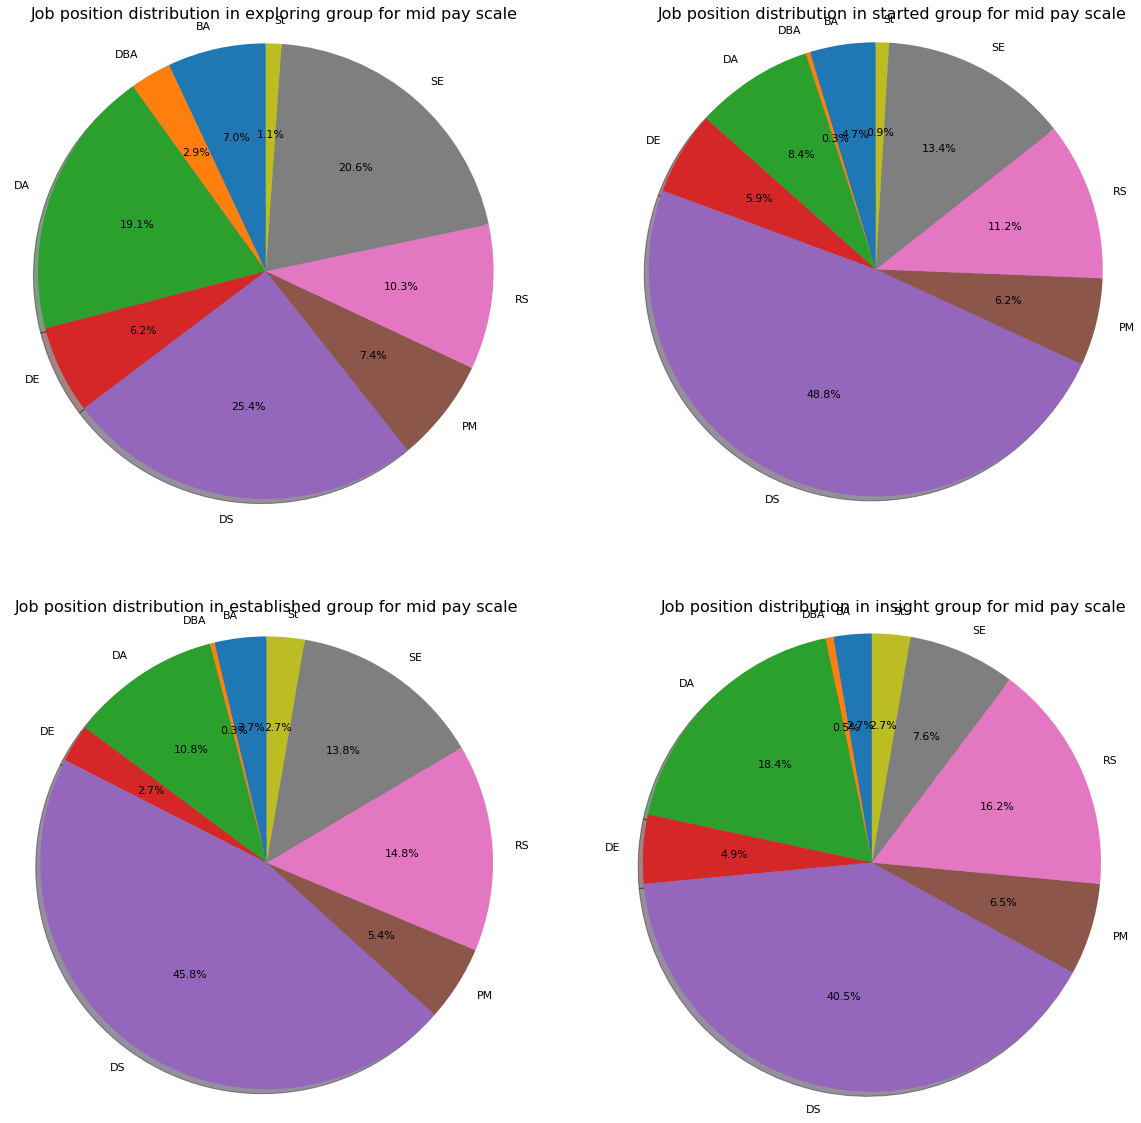

In [28]:
labels = 'BA', 'DBA', 'DA', 'DE','DS','PM','RS','SE','St'

fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].pie(question_exp_mid_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0, 0].set_title('Job position distribution in exploring group for mid pay scale',loc='right',fontsize=16)

ax[0,1].pie(question_start_mid_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,1].set_title('Job position distribution in started group for mid pay scale',loc='right',fontsize=16)

ax[1,0].pie(question_est_mid_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,0].set_title('Job position distribution in established group for mid pay scale',loc='right',fontsize=16)

ax[1,1].pie(question_insight_mid_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].set_title('Job position distribution in insight group for mid pay scale',loc='right',fontsize=16)

plt.show()

From the perspective of understanding the relation of using ML methods in business to the number of job position title in each group, for the sake of simplicity and the scope of this report, it is sufficient to analyse the distribution of 'Data Analyst', 'Data Engineer' and 'Data Scientist'. 
1. Data Analyst analyses the data, in other words typical responsibility of data analyst is more or less confined to the handling of data, visualization and reporting of data which are mostly entry level positions.  
2. Data Engineer is typically responsible for engineering the ETL pipelining, optimization, API integration etc. This can be associated more with associate level position with respect to data science.
3. Data Scientist are typically responsible for overtaking all the complex data interpretation, in depth experience and understanding in statistical analysis, machine learning models etc. The are the one most responsible for integrating ML model in business, or drawing insight from such etc.
Reading through these definations of responsibilty, it becomes clear why the distribution of such positions are why as it is. Companies in the started, established and insight group are most likely to deal with machine learning models. Well, its not only likely, it is how it is. This is because the question 8 specifically asks about the use of ML methods in business. and who are most responsible for investigating ML methods? Its any one's guess, its data scientist right? Well this is why more than 40% of the positions in each group of started, established and insight are that of data scientists compared to mere 25% in the exploring group. And it is not surprising that the distribution of data analyst and data engineer in exploring group is higher than that of other three groups.

Another interesting point is that as a company moves more towards incorporating ML methods in their business, the number of data engineer positions reduces, which is evident by the lowest percentage of data engineers in established group. This is because most of the work that are done by data analyst or data engineer can be easily made redundant by data scientists with strong technical skills and experience who mostly will join established group than their other counter parts. Take for example the process of feature extraction, feature selection etc., these methods are not explicitly required when using deep learning techniques. As a result, one of the conclusion that can be made is a company that uses well established ML methods is less likely to hire a data engineer or data analyst as opposed to data scientist. 

Let us see if we can see the consistency in observation as we move up the pay scale

Text(1.0, 1.0, 'Job position distribution in insight group for large pay scale')

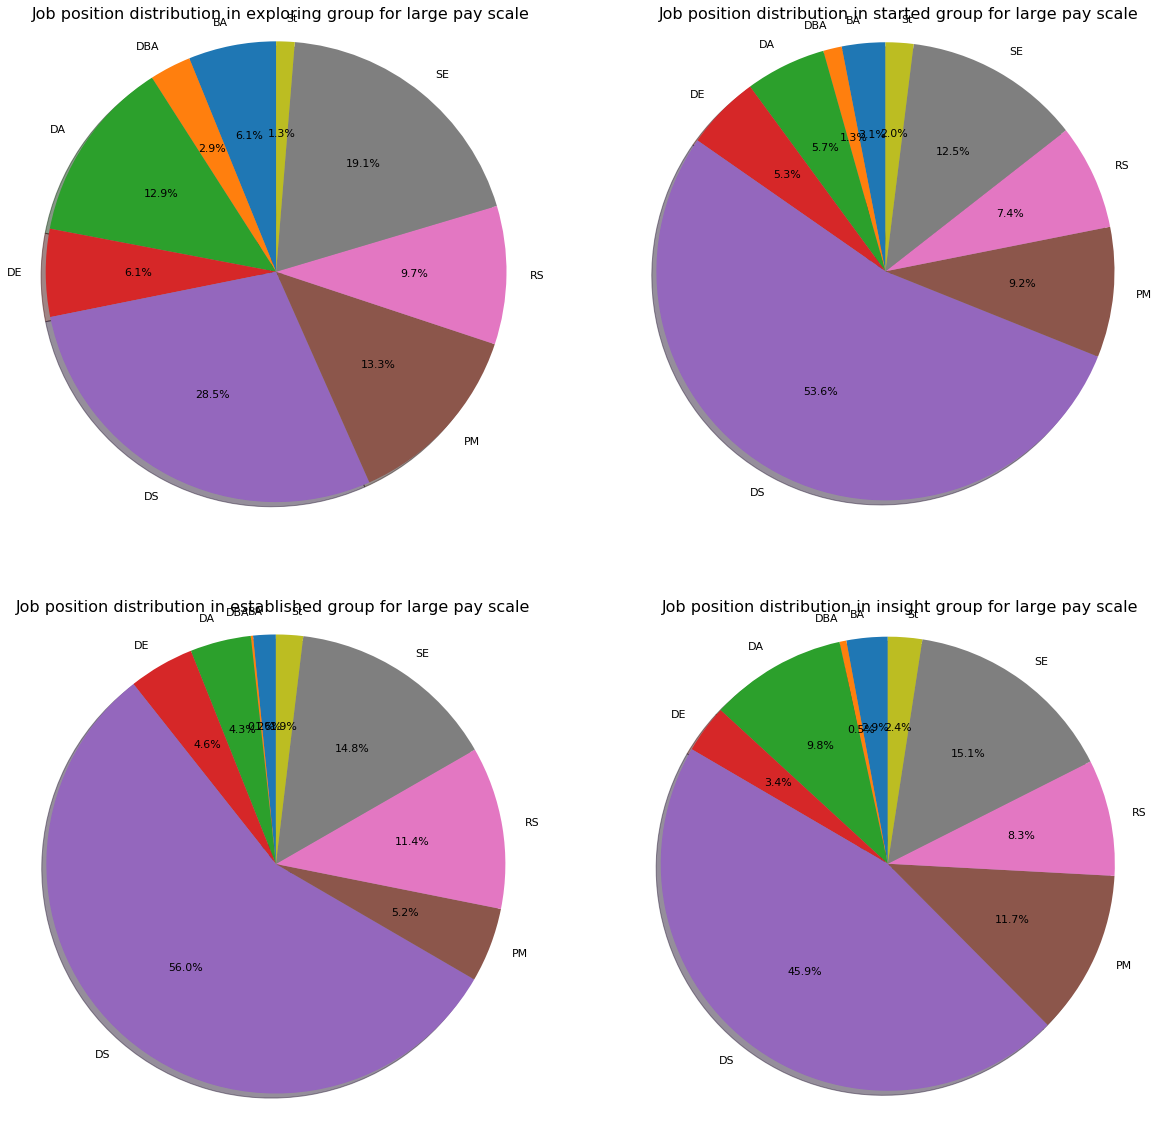

In [29]:
labels = 'BA', 'DBA', 'DA', 'DE','DS','PM','RS','SE','St'

fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].pie(question_exp_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0, 0].set_title('Job position distribution in exploring group for large pay scale',loc='right',fontsize=16)

ax[0,1].pie(question_start_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,1].set_title('Job position distribution in started group for large pay scale',loc='right',fontsize=16)

ax[1,0].pie(question_est_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,0].set_title('Job position distribution in established group for large pay scale',loc='right',fontsize=16)

ax[1,1].pie(question_insight_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].set_title('Job position distribution in insight group for large pay scale',loc='right',fontsize=16)

Well. It does stands more or less true for large pay scale too. How about very large pay scale?

Text(1.0, 1.0, 'Job position distribution in insight group for very large pay scale')

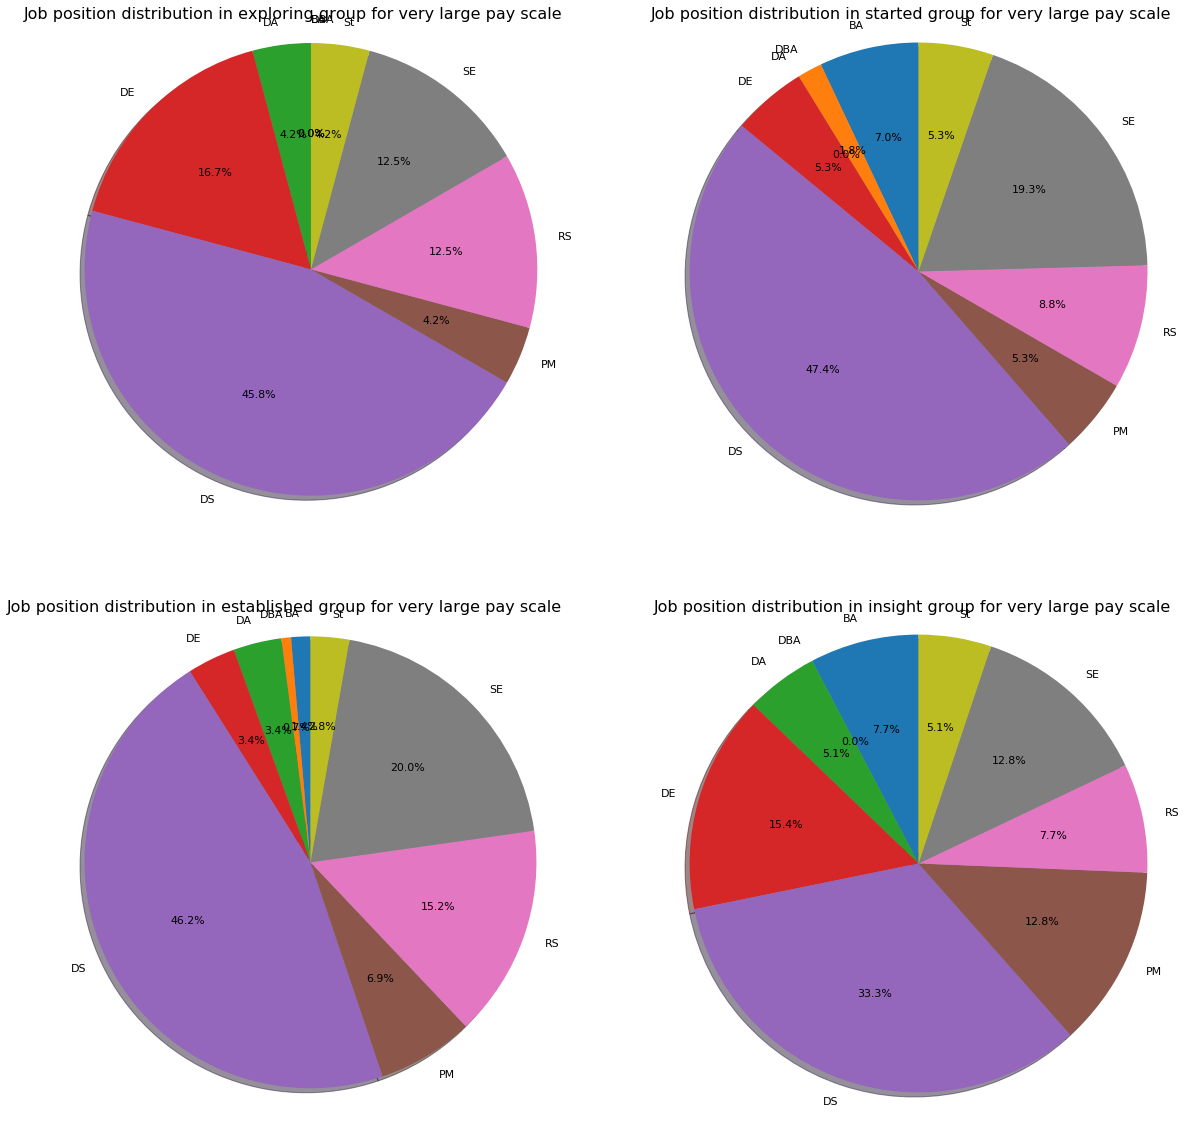

In [30]:
labels = 'BA', 'DBA', 'DA', 'DE','DS','PM','RS','SE','St'

fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].pie(question_exp_very_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0, 0].set_title('Job position distribution in exploring group for very large pay scale',loc='right',fontsize=16)

ax[0,1].pie(question_start_very_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,1].set_title('Job position distribution in started group for very large pay scale',loc='right',fontsize=16)

ax[1,0].pie(question_est_very_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,0].set_title('Job position distribution in established group for very large pay scale',loc='right',fontsize=16)

ax[1,1].pie(question_insight_very_large_pay, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 11})
ax[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].set_title('Job position distribution in insight group for very large pay scale',loc='right',fontsize=16)

Although for very large scale pay scale, the number of data scientists in established group is almost equal to the ones in other groups, it is interesting to note that the case of very large scale pays are in itself an outlier to the other two cases. This is because very large scale pays are not very common, but where they are common, we can still see that even here the majority of positions are bragged by data scientist position and the trend that the number of data engineers are considerably less in established group than their exploring, insight or started counterpart is still seen here in this case too.

**Conclusion** In this article, we have analysed and discussed some of the key factors that are influenced when a company employs ML models in their business. We have studied trends of companies in different stages of employing ML models in their business. This is done by understanding the relation of a company's size, compensation of employees, position held by employees in different categories. We have seen interesting trends and presented data driven facts that are associated with the adoption of Ml methods in business. We hope that the readers will find the analyses interesting and thought provoking.   